In [1]:
!pip install -qU keras

## Libraries

In [2]:
import cv2
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical, plot_model

## Data Preprocessing

In [3]:
data_path = '/kaggle/input/emotion-faces/emotion_faces'

In [4]:
classes = listdir(data_path)
classes

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

In [5]:
num_classes = len(classes)
num_classes

7

In [6]:
img_data = []
labels = []

for idx, category in enumerate(classes):
    img_list = listdir(f"{data_path}/{category}")
    for img_name in img_list:
        img = cv2.imread(f"{data_path}/{category}/{img_name}")
        img = cv2.resize(img, (48, 48))
        img_data.append(img)
        labels.append(idx)

In [7]:
data = np.array(img_data, dtype='float32') / 255.0
labels = np.array(labels)

img_labels = to_categorical(labels, num_classes)

In [8]:
print("Data shape:", data.shape)
print("Labels shape:", img_labels.shape)

Data shape: (981, 48, 48, 3)
Labels shape: (981, 7)


In [9]:
x_img = data
y_img = img_labels

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, test_size=.2, shuffle=True, stratify=y_img, random_state=360)

## Model Building

In [11]:
def build_model():
    input_shape = x_img[0].shape

    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(7, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=[
            'accuracy',
            keras.metrics.F1Score(average='weighted', name='F1Score')
        ]
    )
    return model

In [12]:
model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 388,679 (1.48 MB)

 Trainable params: 388,679 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [14]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - F1Score: 0.1573 - accuracy: 0.2329 - loss: 1.8827 - val_F1Score: 0.1032 - val_accuracy: 0.2538 - val_loss: 1.8488
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.1926 - accuracy: 0.2756 - loss: 1.8151 - val_F1Score: 0.2808 - val_accuracy: 0.4315 - val_loss: 1.6245
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.2951 - accuracy: 0.4009 - loss: 1.5860 - val_F1Score: 0.4257 - val_accuracy: 0.5178 - val_loss: 1.2658
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.4553 - accuracy: 0.5147 - loss: 1.2953 - val_F1Score: 0.6480 - val_accuracy: 0.7310 - val_loss: 0.9586
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.5664 - accuracy: 0.6298 - loss: 0.9854 - val_F1Score: 0.6661 - val_accuracy: 0.7411 - val_loss: 0.7632
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - F1Score: 0.6330 - accuracy: 0.6826 - loss: 0.8206 - val_F1Score: 0.7414 - val_accuracy: 0.7970 - val_loss: 0.6088
Ep

## Model Evaluation

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

F1Score = history.history['F1Score']
val_F1Score = history.history['val_F1Score']

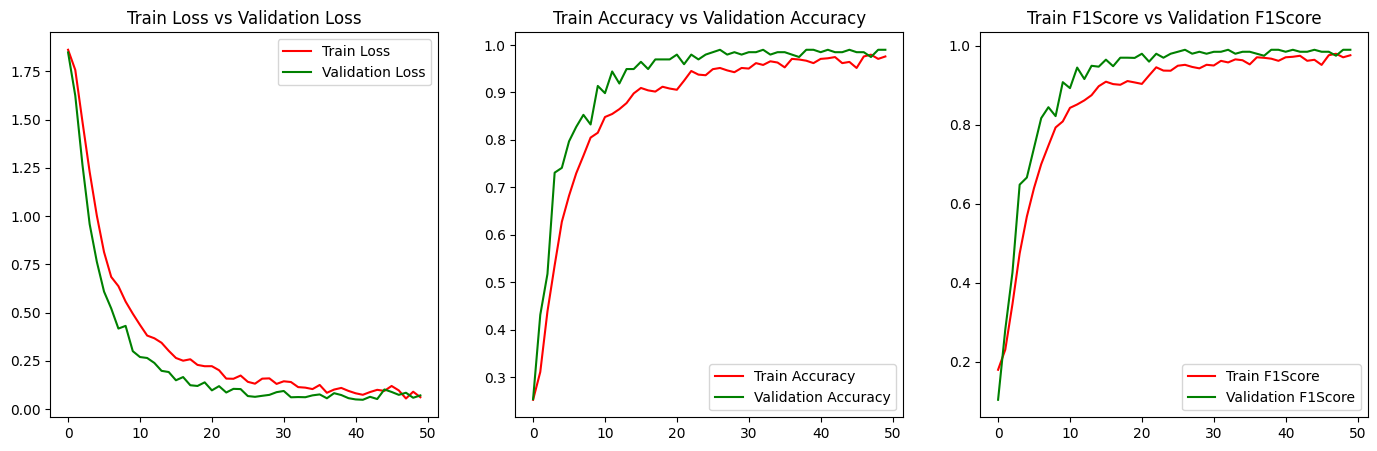

In [16]:
# Create a figure
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# First subplot: Loss
axes[0].plot(train_loss, 'r', label='Train Loss')
axes[0].plot(val_loss, 'g', label='Validation Loss')
axes[0].set_title('Train Loss vs Validation Loss')
axes[0].legend()

# Second subplot: Accuracy
axes[1].plot(train_acc, 'r', label='Train Accuracy')
axes[1].plot(val_acc, 'g', label='Validation Accuracy')
axes[1].set_title('Train Accuracy vs Validation Accuracy')
axes[1].legend()

# Second subplot: F1Score
axes[2].plot(F1Score, 'r', label='Train F1Score')
axes[2].plot(val_F1Score, 'g', label='Validation F1Score')
axes[2].set_title('Train F1Score vs Validation F1Score')
axes[2].legend()

# Show the plots
plt.show()

In [17]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


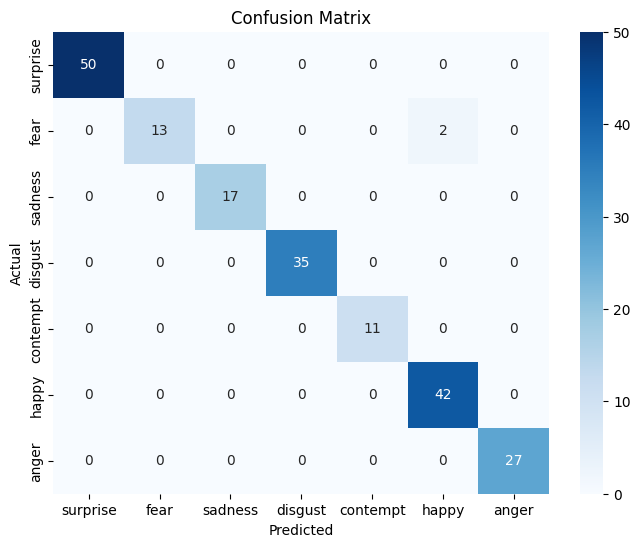

In [18]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Saving

In [19]:
model.save("emotion_classification_model.h5")